In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_ccs = pd.read_csv("../../results/cpc2ccs_normal_tp_fp_analysis.tsv", sep="\t")
df_cso = pd.read_csv("../../results/cpc2cso_normal_tp_fp_analysis.tsv", sep="\t")

In [3]:
is_correct_cso = df_cso.is_correct
df_cso.drop(["Unnamed: 0", "source", "target", "is_correct"], axis=1, inplace=True)
df_cso_tp_tn = df_cso.apply(lambda x: x == is_correct_cso, axis=0)
df_cso_tp_tn["gt_indication"] = is_correct_cso # if true we know it was a true positive/false negative; if false we know it is a true negative/false positive
df_cso_tp_tn.sort_values(by=["gt_indication", "logmap"], inplace=True, ascending=False)

In [4]:
is_correct_ccs = df_ccs.is_correct
df_ccs.drop(["Unnamed: 0", "source", "target", "is_correct"], axis=1, inplace=True)
df_ccs_tp_tn = df_ccs.apply(lambda x: x == is_correct_ccs, axis=0)
df_ccs_tp_tn["gt_indication"] = is_correct_ccs
df_ccs_tp_tn.sort_values(by=["gt_indication", "logmap"], inplace=True, ascending=False)

In [5]:
gt_indication_ccs = df_ccs_tp_tn.gt_indication
gt_indication_cso = df_cso_tp_tn.gt_indication
df_ccs_tp_tn.drop("gt_indication", axis=1, inplace=True)
df_cso_tp_tn.drop("gt_indication", axis=1, inplace=True)
df_ccs_tp_tn.columns = ["LogMap", "LogMap_Exp", "LogMap-Lt", "AML", "SANOM", "SANOM_WordNet", "OntoConnect", "LogMap-ML_Owl2Vec*Label", "LogMap-ML_Owl2Vec*Path", "LogMap-ML_Word2VecLabel", "LogMap-ML_Word2VecPath", "BERTMap_200", "BERTMap_25", "LXLHMeta", "LJLEvolutionary", "Baseline" ]
df_cso_tp_tn.columns = ["LogMap", "LogMap_Exp", "LogMap-Lt", "AML", "SANOM", "SANOM_WordNet", "OntoConnect", "LogMap-ML_Owl2Vec*Label", "LogMap-ML_Owl2Vec*Path", "LogMap-ML_Word2VecLabel", "LogMap-ML_Word2VecPath", "BERTMap_200", "BERTMap_25", "LXLHMeta", "LJLEvolutionary", "Baseline" ]

In [6]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (13, 9.50),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

## CSO

The y-axis of the following heatmap has one entry per approach/configuration.
The x-axis, on the other hand, has one entry for each $c \in C$ whereby $C = P \cup E$ with $P$ being the union over all correspondences that at least one system has predicted and $E$ being the ground truth.
Green values indicate true positives or true negatives, and red indicates false positives or false positives.

We see that the systems sanom and ontoconnet are way too aggressive, i.e. they predict too many correspondences and have, as a consequence, too many false positives.
The other systems seem to perform rather similar, including the baseline.
This indicates that all the systems, besides ontoconnect and sanom, are only able to predict relatively easy mappings from the ground truth, i.e. mappings where the labels are very similar such as "Software pipelining" and "software pipelining"
Other, more complicated, mappings that often rely on structural understanding of the ontologies are not predicted by any ontology alignment system.
Examples for more complicated mappings are: "Transformation of program code" to "program compilers" or "Arrangements for software engineering" to "software"

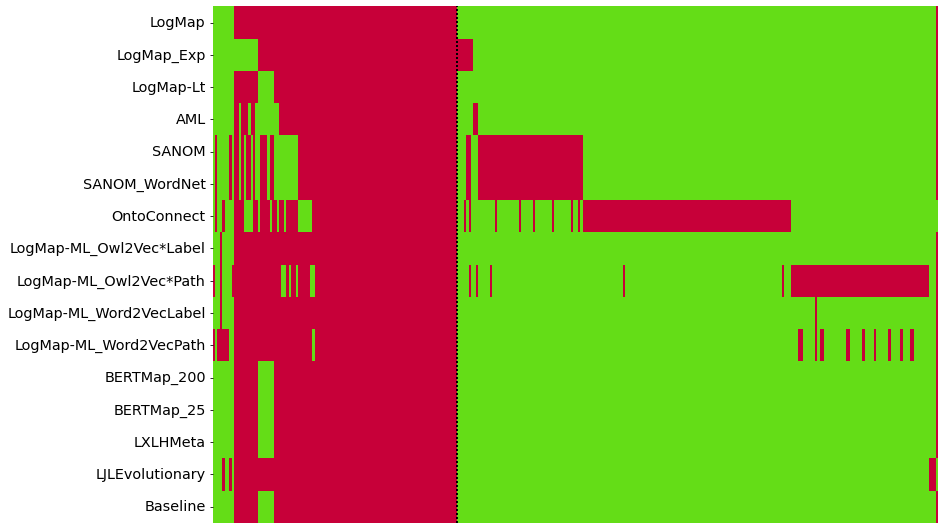

In [7]:
#plt.rcParams["figure.autolayout"] = True

sns.set_palette(sns.color_palette(["#C70039", "#64dd17"]))
ax = sns.heatmap(df_cso_tp_tn.transpose(), cmap=sns.color_palette(), cbar=False, xticklabels=False)
#ax.set(xlabel="All correspondences that are predicted by at least one system")
#ax.set(xlabel=None)
ax.axvline(np.sum(gt_indication_cso), linewidth=2, color="black", dashes=(1, 1, 1, 1) )

plt.show()

## CCS

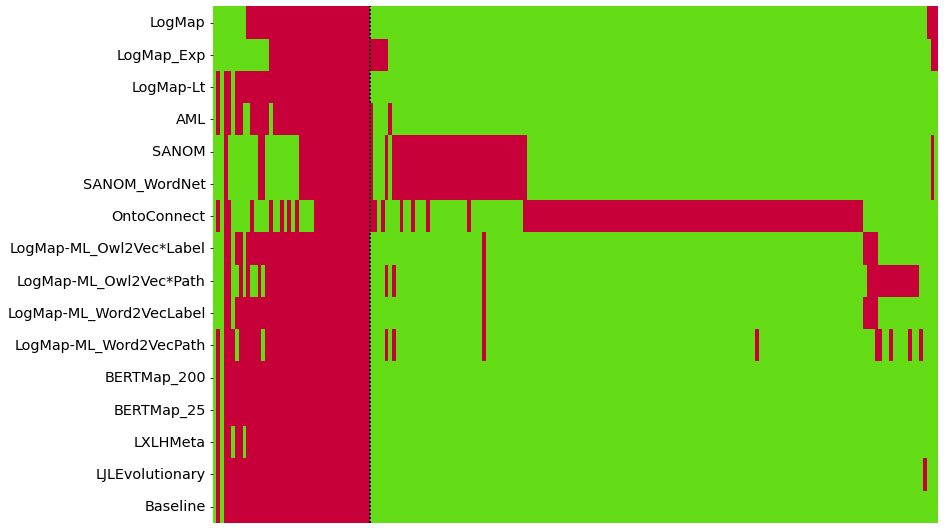

In [8]:
#plt.rcParams["figure.autolayout"] = True

sns.set_palette(sns.color_palette(["#C70039", "#64dd17"]))
ax = sns.heatmap(df_ccs_tp_tn.transpose(), cmap=sns.color_palette(), cbar=False, xticklabels=False)
#ax.set(xlabel="All correspondences that are predicted by at least one system")
ax.set(xlabel=None)
ax.axvline(np.sum(gt_indication_ccs), linewidth=2, color="black", dashes=(1, 1, 1, 1) )

plt.show()

Essentially the same observations as above.